<a href="https://colab.research.google.com/github/j21j/CAP4630/blob/main/HW4/CAP4630_HW4_Jones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Network Homework
## Jia Jones HW 4 CAP 4630

In this assignment, we will implement a basic RNN network and an LSTM network with Pytorch to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 80 points, with extra 10 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement a RNN model to predict time series##
### 1.1 Prepare the data (10 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(2.5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(2.5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(2.5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2.5 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**.
2. Set the data types of both train and test data to "float32".
3. Use **past 12** datapoints as input data X to predict the **next 1** datapoint as Y, which is the 'next token prediction'. The time window will be 12.
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [1]:
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

# Step 1. Use pandas to read training and testing from txt file. (2.5 pts)
train_data = read_csv("train.txt", header=0, usecols=[1], dtype=np.float32).values
test_data = read_csv("test.txt", header=0, usecols=[1], dtype=np.float32).values

# Step 2. Normalize training and test data into [0, 1]. (2.5 pts)
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data)
test_data = scaler.fit_transform(test_data)

# Step 3. Create a training and test datasets. (2.5 pts)
window_size = 12
trainX, trainY = [], []
testX, testY = [], []

for i in range(len(train_data) - window_size):
    trainX.append(train_data[i:i + window_size])
    trainY.append(train_data[i + window_size])

for i in range(len(test_data) - window_size):
    testX.append(test_data[i:i + window_size])
    testY.append(test_data[i + window_size])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# Step 4. Print out the shape of data. (2.5 pts)
# first 3 TRAIN data and labels
# for i in range (12):
#   print(f"trainX{i} = {trainX[i].reshape(1, -1)}")
#   print(f"trainY{i} = {[trainY[i]]}\n")

print("\nShapes:")
print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)

print("\nTest Data:\n", testX)
print("\nTest Labels:\n", testY)


Shapes:
trainX shape: (101, 12, 1)
trainY shape: (101, 1)
testX shape: (17, 12, 1)
testY shape: (17, 1)

Test Data:
 [[[0.5801282 ]
  [0.625     ]
  [0.30128205]
  [0.15705132]
  [0.        ]
  [0.08653843]
  [0.16025639]
  [0.1025641 ]
  [0.3076923 ]
  [0.27564108]
  [0.3525641 ]
  [0.5192307 ]]

 [[0.625     ]
  [0.30128205]
  [0.15705132]
  [0.        ]
  [0.08653843]
  [0.16025639]
  [0.1025641 ]
  [0.3076923 ]
  [0.27564108]
  [0.3525641 ]
  [0.5192307 ]
  [0.7628205 ]]

 [[0.30128205]
  [0.15705132]
  [0.        ]
  [0.08653843]
  [0.16025639]
  [0.1025641 ]
  [0.3076923 ]
  [0.27564108]
  [0.3525641 ]
  [0.5192307 ]
  [0.7628205 ]
  [0.798077  ]]

 [[0.15705132]
  [0.        ]
  [0.08653843]
  [0.16025639]
  [0.1025641 ]
  [0.3076923 ]
  [0.27564108]
  [0.3525641 ]
  [0.5192307 ]
  [0.7628205 ]
  [0.798077  ]
  [0.49038458]]

 [[0.        ]
  [0.08653843]
  [0.16025639]
  [0.1025641 ]
  [0.3076923 ]
  [0.27564108]
  [0.3525641 ]
  [0.5192307 ]
  [0.7628205 ]
  [0.798077  ]
  [0

### 1.2 - Build the RNN model (30 Points) ##


Build a RNN model with RNN cell.

**Tasks:**
1. Build an RNN model with 1 RNN layer and 1 Linear layer, with RNN's hidden size to be 4.  **(15 Points)**
2. Initialize model, optimizer and criterion. **(7.5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10** and **print out the average traning loss for every 100 epochs**. **(7.5 Points)**

**Hints:**  
1. You can use **nn.RNN** to specify RNN cells.
2. Use loss function (criterion) **MSELoss()** and select **Adam** optimizer with **learning_rate=0.005** and other default settings.

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import warnings

# Complete the model architecture (10 pts)
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
      super(RNN, self).__init__()
      self.hidden_size = hidden_size
      self.rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size, batch_first=True) #fill in ()
      self.fc = nn.Linear(hidden_size, output_size) #fill in ()

    def forward(self, x):
      rnn_out, _ = self.rnn(x)
      out = self.fc(rnn_out[:, -1, :])
      return out

# Create an instance of model, optimizer and criterion. (5 pts)
# variables
input_size = 1
hidden_size = 4
output_size = 1
num_epochs = 1000
batch_size = 10
learning_rate = 0.005

# Prepare training data for PyTorch
# trainX_torch = torch.tensor(trainX, dtype=torch.float32).unsqueeze(-1)  # Adding input_size dimension
# trainY_torch = torch.tensor(trainY, dtype=torch.float32)

trainX = torch.tensor(trainX).float().reshape(-1, window_size, input_size)  # Shape: (batch_size, sequence_length, input_size)
trainY = torch.tensor(trainY).float().reshape(-1, output_size)  # Shape: (batch_size, output_size)

testX = torch.tensor(testX).float().reshape(-1, window_size, input_size)
testY = torch.tensor(testY).float().reshape(-1, 1)

# Create DataLoader for batching
train_dataset = TensorDataset(trainX, trainY)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

model = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

warnings.filterwarnings("ignore")
# Train the RNN Model for 1000 epoch and print out the training loss for every 100 epochs. (5 pts)
for epoch in range(1, num_epochs + 1):
    #permutation = torch.randperm(trainX.size(0))
    total_loss = 0
    for batch_x, batch_y in train_loader:
        #indices = permutation[i:i + batch_size]
        #batch_X, batch_Y = trainX[indices], trainY[indices]

        optimizer.zero_grad() # Zero the gradient
        outputs = model(batch_x) # Forward pass
        loss = criterion(outputs, batch_y) # Compute the loss
        loss.backward() # Backward pass
        optimizer.step() # Update the weights
        total_loss += loss.item()

    # Print average loss every 100 epochs
    if epoch % 100 == 0:
        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch}/{num_epochs}] Loss: {avg_loss:.4f}')

print("\nTraining complete.")




Epoch [100/1000] Loss: 0.0043
Epoch [200/1000] Loss: 0.0027
Epoch [300/1000] Loss: 0.0030
Epoch [400/1000] Loss: 0.0025
Epoch [500/1000] Loss: 0.0025
Epoch [600/1000] Loss: 0.0015
Epoch [700/1000] Loss: 0.0022
Epoch [800/1000] Loss: 0.0021
Epoch [900/1000] Loss: 0.0024
Epoch [1000/1000] Loss: 0.0018

Training complete.


### 1.3 Evaluate Predictive Model Performance (**Bonuse point 10 Points**)

Predict datapoints with the observed datapoints and trained model.

**Tasks:**
1. Make prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Denormalize the prediction results back to original scale with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. The plot for validation is shown below (observation test data are blue and prediction results are orange):
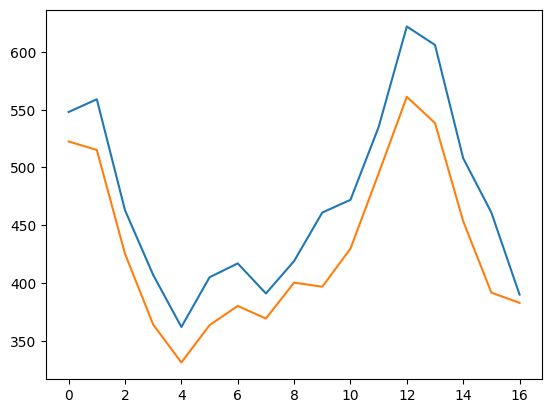

<span style="color:magenta">
    The corresponding figures could be different from the one above, but should be reasonable.**
</span>


Train RMSE: 12.6802
Test RMSE: 25.3933


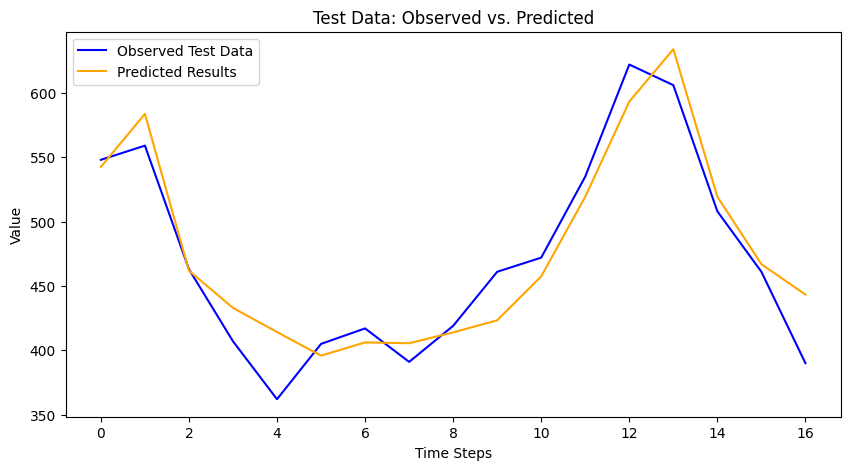

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1. Inference above model on training and testing data. (2 pts)
train_predictions = model(trainX).detach().numpy()
test_predictions = model(testX).detach().numpy()

# Step 2. Denomalization. (3 pts)
train_predictions_denorm = scaler.inverse_transform(train_predictions)
trainY_denorm = scaler.inverse_transform(trainY.numpy())

test_predictions_denorm = scaler.inverse_transform(test_predictions).flatten()
testY_denorm = scaler.inverse_transform(testY.numpy())

# Step 3. Calculate root mean squared error for training and testing and print. (3 pts)
train_rmse = np.sqrt(mean_squared_error(trainY_denorm, train_predictions_denorm))
test_rmse = np.sqrt(mean_squared_error(testY_denorm, test_predictions_denorm))

print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Step 4. Plot the predictions. (2 pts)
plt.figure(figsize=(10, 5))
plt.plot(testY_denorm, label='Observed Test Data', color='blue')
plt.plot(test_predictions_denorm, label='Predicted Results', color='orange')
plt.title('Test Data: Observed vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


## 2 - Use LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (10 Points) ###
Conduct sentiment analysis using IMDB data with reccurent neural network. Make prediction on sentiment (positive/negative) as a binary classification.
More details can be found here, https://keras.io/api/datasets/imdb/

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(5 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(5 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here, max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.

**Note:**\
We train the build LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.

In [5]:
import torch
import random
import numpy as np

from keras.preprocessing import sequence
from keras.datasets import imdb

# Step 1. Load IMDB dataset from keras. (5 pts)
max_features = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print(f"Length of training data: {len(x_train)}")
print(f"Length of test data: {len(x_test)}")
print(f"Length of the first training sequence: {len(x_train[0])}")
print(f"Length of the first test sequence: {len(x_test[0])}")
print()

# Step 2. Preprocess the sequences with padding (5 pts)
maxlen = 100
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print(f"Shape of padded training data: {x_train.shape}")
print(f"Shape of padded test data: {x_test.shape}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Length of training data: 25000
Length of test data: 25000
Length of the first training sequence: 218
Length of the first test sequence: 68

Shape of padded training data: (25000, 100)
Shape of padded test data: (25000, 100)


### 2.2 - Design and train LSTM model (30 Points) ###

Build a LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Linear layer**. The embedding vector is specified with the dimension of **8**. **(15 Points)**
2. Create LSTM model with **Adam** optimizer, **binary_crossentropy** loss function (BCELoss()). **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. You need to use TensorDataset and DataLoader to split the data into batches with batch_size and shuffle the data. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. You need to initialize hidden(h) and cell(c) for the lstm and always use h and c as input to your lstm layer. (For performance)
3. Set **hidden dimension = 8** for LSTM layer.
4. Use only the last layer as the input of linear layer (For performance)
5. Set activation function to **sigmoid** for Linear layer.
6. You may have some trouble with the data dimension, please consider using squeeze or unsqueeze to make two data have the same dimension.
7. Write a constructor with many configurations (number of layers, embedding dimension...) could save you a lot of time for the bonus questions since you can reuse the code here.

In [8]:
import torch
import torch.nn as nn

# Complete LSTM model architecture. (20 pts)
class LSTMClassifier(nn.Module):
    def __init__(self, max_features, embedding_dim, hidden_dim, num_layers):
        super(LSTMClassifier, self).__init__()
        self.embeddings = nn.Embedding(max_features, embedding_dim) #Fill in ()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True) #Fill in ()
        self.classifier = nn.Linear(hidden_dim, 1) #Fill in ()
        self.sigmoid = nn.Sigmoid()

    def forward(self, sentence):
        embedded = self.embeddings(sentence)

        # Initialize hidden and cell states (h0, c0)
        h0 = torch.zeros(1, sentence.size(0), hidden_dim).to(sentence.device)
        c0 = torch.zeros(1, sentence.size(0), hidden_dim).to(sentence.device)

        # Pass through LSTM layer
        lstm_out, (hn, cn) = self.lstm(embedded, (h0, c0))

        # Use the last hidden state for classification
        out = self.classifier(hn[-1])

        # Apply sigmoid for binary classification
        out = self.sigmoid(out)

        return out

x_train_tensor = torch.tensor(x_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Add dimension for binary classification
x_test_tensor = torch.tensor(x_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create TensorDataset and DataLoader for batching
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Create an instance of LSTM model, an adam optimizer and BCE loss. (5 pts)
embedding_dim = 8  # Embedding dimension
hidden_dim = 8  # Hidden state dimension for LSTM
num_layers = 1

# Initialize the model
model = LSTMClassifier(max_features=max_features, embedding_dim=embedding_dim, hidden_dim=hidden_dim, num_layers=num_layers)

# Loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model, print out the loss. (5 pts)
num_epochs = 10
best_val_accuracy = 0

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    # Training phase
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()  # Zero the gradients
        output = model(data) # Forward pass
        loss = criterion(output, target) # Compute loss
        loss.backward() # Backward pass
        optimizer.step() # Update the weights
        total_loss += loss.item()

        # Get predictions
        predicted = (output >= 0.5).float()  # Convert to binary predictions
        correct_predictions += (predicted == target).sum().item()
        total_samples += target.size(0)

    # Calculate training accuracy
    train_accuracy = 100.0 * correct_predictions / total_samples
    avg_loss = total_loss / len(train_loader)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    correct_predictions = 0
    total_samples = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            predicted = (output >= 0.5).float()  # Convert to binary predictions
            correct_predictions += (predicted == target).sum().item()
            total_samples += target.size(0)

    # Calculate validation accuracy
    val_accuracy = 100.0 * correct_predictions / total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%')

    # Save the best validation accuracy
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy

# Print out the best validation accuracy. (5 pts)
print(f'\nBest Validation Accuracy: {best_val_accuracy:.2f}%')



Epoch [1/10], Loss: 0.6887, Train Accuracy: 53.32%, Val Accuracy: 55.56%
Epoch [2/10], Loss: 0.6561, Train Accuracy: 61.08%, Val Accuracy: 66.14%
Epoch [3/10], Loss: 0.6047, Train Accuracy: 68.06%, Val Accuracy: 69.04%
Epoch [4/10], Loss: 0.5649, Train Accuracy: 71.87%, Val Accuracy: 72.62%
Epoch [5/10], Loss: 0.5361, Train Accuracy: 73.86%, Val Accuracy: 73.62%
Epoch [6/10], Loss: 0.5057, Train Accuracy: 76.16%, Val Accuracy: 75.96%
Epoch [7/10], Loss: 0.4790, Train Accuracy: 77.90%, Val Accuracy: 77.15%
Epoch [8/10], Loss: 0.4581, Train Accuracy: 79.01%, Val Accuracy: 78.60%
Epoch [9/10], Loss: 0.4391, Train Accuracy: 80.23%, Val Accuracy: 79.34%
Epoch [10/10], Loss: 0.4231, Train Accuracy: 81.20%, Val Accuracy: 79.52%

Best Validation Accuracy: 79.52%
